# Librerias

In [ ]:
!pip install biopython
from Bio import SearchIO
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt
from Bio import AlignIO
import pandas as pd
from collections import defaultdict
!sudo apt-get install mafft
!sudo apt-get install hmmer
import numpy as np
import seaborn as sns


     |████████████████████████████████| 2.3MB 4.3MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  blast2 fonts-lato javascript-common libauthen-sasl-perl libdata-dump-perl
  libencode-locale-perl libfile-listing-perl libfont-afm-perl
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl
  libhtml-tagset-perl libhtml-tree-perl libhttp-cookies-perl
  libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl libio-html-perl libio-socket-ssl-perl libjs-jquery
  liblwp-mediatypes-perl liblwp-protocol-https-perl libmailtools-perl
  libnet-http-perl libnet-smtp-ssl-perl libnet-ssleay-perl libruby2.5
  libtimedate-perl libtry-tiny-perl liburi-perl libwww-perl
  libwww-robotrules-perl lynx lynx-common ncbi-blast+ ncbi-blast+-legacy
  ncbi-data netbase perl-openssl-defaults rake ruby ruby-did-you-mean
  ruby-minitest ruby-net-telnet ruby-power-assert ruby-te

In [ ]:
!sudo apt-get install mafft
!sudo apt-get install hmmer


# Objetivo 1

In [ ]:
!mafft protoglobin_seed.fasta > seed_msa.fasta
!hmmbuild seed_modelo.hmm seed_msa.fasta
!hmmsearch seed_modelo.hmm globin_full_sequences.fasta > protoglobin.out


nthread = 0
stacksize: 8192 kb
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 78
done.

Constructing a UPGMA tree (efffree=0) ... 
   70 / 78
done.

Progressive alignment 1/2... 
STEP    71 / 77 d
Reallocating..done. *alloclen = 1393
STEP    77 / 77 d
done.

Making a distance matrix from msa.. 
    0 / 78
done.

Constructing a UPGMA tree (efffree=1) ... 
   70 / 78
done.

Progressive alignment 2/2... 
STEP    74 / 77 d
Reallocating..done. *alloclen = 1399
STEP    77 / 77 d
done.

disttbfast (aa) Version 7.310 alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versio

# Objetivo 2

In [ ]:
#Objetivo 2: Recuperar los dominios con Python
#1a) Histograma de puntajes de dominio
def hist_puntajes(archivo, bins = 150):
  lista=[]
  resultados=list(SearchIO.read(archivo,'hmmer3-text'))
  for hit in resultados:
    for hsp in hit:
      lista.append(hsp.bitscore)
      #print(lista)   
  histogram=plt.hist(lista, bins= bins)
  plt.show()

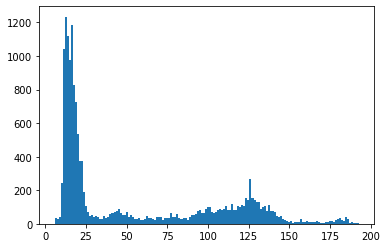

In [ ]:
hist_puntajes("protoglobin.out")

In [ ]:
#1b) Determinación de puntaje de corte y Extracción del archivo de los dominios de interès.
def extraerPosiciones(puntaje_corte, archivo):
    uniprot_id=[]
    env_start=[]
    env_end=[]
    resultados=list(SearchIO.read(archivo,'hmmer3-text'))
    for hit in resultados:
        for hsp in hit:
            if hsp.bitscore >= puntaje_corte:
                id=hit.id.split("|")[1]
                uniprot_id.append(id)
                env_start.append(hsp.env_start)
                env_end.append(hsp.env_end)
    return uniprot_id, env_start, env_end

uniprot_id,env_start,env_end = extraerPosiciones(60, 'protoglobin.out')
data= list(zip(uniprot_id,env_start,env_end))
data_frame= pd.DataFrame(data, columns=['uniprot_id','env_start','env_end'])
data_frame

,uniprot_id,env_start,env_end
0,A0A1S8B7A5,19,202
1,A0A1J9R3D6,19,202
2,K2RH15,19,202
3,A0A177CJ86,17,200
4,G0RZQ1,17,200
...,...,...,...
5624,A0A1B7VL51,5,160
5625,A0A1B7X1G6,5,160
5626,A0A3N5LV26,19,133
5627,A0A2S6CPH1,5,160


In [ ]:
def extraerPosiciones(puntaje_corte, archivo):
    lista_filt = defaultdict(list)
    uniprot_id=[]
    env_start=[]
    env_end=[]
    resultados=list(SearchIO.read(archivo,'hmmer3-text'))
    for hit in resultados:
        for hsp in hit:
            if hsp.bitscore >= puntaje_corte:
                id_prot=hit.id.split("|")[1]
                lista_filt[id_prot].append([hsp.env_start, hsp.env_end])
    return lista_filt

lista_protoglobin = extraerPosiciones(60, 'protoglobin.out')
print(lista_protoglobin)

defaultdict(<class 'list'>, {'A0A1S8B7A5': [[19, 202]], 'A0A1J9R3D6': [[19, 202]], 'K2RH15': [[19, 202]], 'A0A177CJ86': [[17, 200]], 'G0RZQ1': [[17, 200]], 'A0A175VX62': [[17, 200]], 'A0A0U1M3Y2': [[36, 219]], 'B2AU65': [[17, 200]], 'R0KWQ3': [[17, 200]], 'A0A1Y1ZMR4': [[18, 200]], 'F7VKQ0': [[24, 207]], 'A0A177D5A9': [[17, 200]], 'A0A3M7LVK3': [[9, 192]], 'M2UDL0': [[18, 202]], 'N4X5N3': [[18, 202]], 'W6XWT6': [[18, 202]], 'W7EPX2': [[18, 202]], 'W6Z2A2': [[18, 202]], 'A0A1Y2M5H2': [[17, 200]], 'E5R5D2': [[17, 200]], 'A0A2T2NTA2': [[17, 200]], 'A0A364MWH2': [[18, 200]], 'M2T1R1': [[18, 202]], 'A0A2W1EJK5': [[20, 203]], 'B2W0B6': [[20, 203]], 'A0A163EC43': [[17, 200]], 'V5I532': [[15, 198]], 'A0A1Q8S944': [[15, 198]], 'A0A3E2H7G0': [[16, 199]], 'A0A395IFK4': [[17, 200]], 'T0LX41': [[15, 198]], 'L2FPT5': [[15, 198]], 'A0A1Y2V9F4': [[16, 199]], 'A0A1Y2TG01': [[16, 199]], 'A0A2L2TID2': [[14, 197]], 'K1WQV4': [[14, 198]], 'N4VQD0': [[15, 198]], 'A0A1S1W095': [[15, 198]], 'A0A225AYS9': [[50

In [ ]:
def guardarDominios(full_fasta, lista_limites, description,archivo_out):
    fastas=list(SeqIO.parse(full_fasta, 'fasta'))
    lista_nueva=[]
    for fasta in fastas:
        prot_id = fasta.id.split("|")[1]
        if prot_id in lista_limites.keys():
            for tupla in lista_limites[prot_id]:
                domain= fasta.seq[tupla[0]:tupla[1]]
                records=SeqRecord(domain, id=prot_id, description= description)
                lista_nueva.append(records)
                
    SeqIO.write(lista_nueva, archivo_out, "fasta")
guardarDominios("globin_full_sequences.fasta", lista_protoglobin, "Protoglobin_domain","protoglobin_sequences.fasta")

[link text](https://)Ejercicio 1c. Responda: 
¿Cuántos dominios de protoglobina logró recuperar de la minería de datos? 
¿Puede afirmar que recuperó todos y que no dejó alguno afuera? 
¿O que solo recuperó dominios protoglobina y que no incorporó dominios globina de otro tipo? ¿Por qué?

5629 dominios en 5629 proteinas (no determinamos proteinas con dos dominios protoglobinas en nuestro set) entre las 35786 proteinas analizadas.

*Dado que el umbral propuesto no fue desafiado no podemos afirmar si recuperamos todos los dominios protoglobina ni que no incorporamos dominios globina de otro tipo.* **(esto habria que pensarlo un poco mas tal vez...)**






# Objetivo 3

Ejercicio 3a) Parsee los MSAs hechos con hmmalign y MAFFT y busque la posición de la histidina F8 (el residuo más conservado y característico de todas las globinas), y calcule la proporción de gaps en el MSA para esa posición.  (sugerencia: busque una columna en el MSA donde la histidina representa más del 80% de los aminoácidos presentes en esa columna). 
Compare el porcentaje de histidinas en esa columna entre los dos MSAs obtenidos (por MAFFT y hmmalign), y la proporción de gaps obtenida. ¿En qué posición está la histidina F8 en cada MSA? ¿Está en la misma posición en ambos casos? ¿En cuál MSA hay más presencia de gaps?


In [ ]:
!hmmalign protoglobin.hmm protoglobin_sequences.fasta 

In [ ]:
!hmmalign -o protoglobin_alin_seqs.fasta seed_modelo.hmm protoglobin_sequences.fasta


In [ ]:
!mafft protoglobin_sequences.fasta > protoglobin_sequences_mafft.fasta


nthread = 0
stacksize: 8192 kb
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 38 ambiguous characters.
 5601 / 5629
done.

Constructing a UPGMA tree (efffree=0) ... 
 5620 / 5629
done.

Progressive alignment 1/2... 
STEP  3283 / 5628 f
Reallocating..done. *alloclen = 1427
STEP  5628 / 5628 d
done.

Making a distance matrix from msa.. 
 5600 / 5629
done.

Constructing a UPGMA tree (efffree=1) ... 
 5620 / 5629
done.

Progressive alignment 2/2... 
STEP  3389 / 5628 f
Reallocating..done. *alloclen = 1430
STEP  5628 / 5628 d
done.

disttbfast (aa) Version 7.310 alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert 

In [ ]:
#Objetivo 3: comparar y analizar alineamientos
#3a) Alinear los dominios. 
#mafft
mafft = AlignIO.read('protoglobin_sequences_mafft.fasta', 'fasta')
mafft_pd= pd.DataFrame(mafft)
mafft_pd= pd.DataFrame(mafft)
for col in mafft_pd.columns:
    print(mafft_pd[col].value_counts(normalize=True).get('H','None'))
# La histidina en el alineamiento con mafft se encuentra en la posicion 456 del alineamiento multiple con una proporcion de 0.9295

In [ ]:
gaps = mafft_pd.apply(pd.value_counts)
gaps_count = gaps.sum(axis=1)
gaps_count

-    3401070.0
A      78801.0
C       4016.0
D      59864.0
E      65681.0
F      39660.0
G      42764.0
H      30024.0
I      63589.0
K      49465.0
L     104587.0
M      23128.0
N      24775.0
P      24861.0
Q      41952.0
R      62076.0
S      48108.0
T      41119.0
V      54797.0
W      12681.0
X         38.0
Y      38758.0
dtype: float64

436 es la posicion de maxima conservacion de histidina en el alinemiento con una proporcion de 0.9314
en esa posicion hay una proporcion de gaps de 0.002


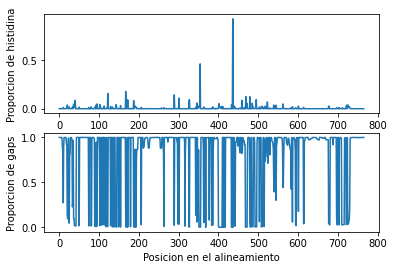

In [ ]:
H = []
for i in range(mafft_pd.shape[1]):
  H.append(sum([1 for j in mafft_pd[i] if j == "H"])/mafft_pd.shape[0])
Gap = []
for i in range(mafft_pd.shape[1]):
  Gap.append(sum([1 for j in mafft_pd[i] if j == "-"])/mafft_pd.shape[0])

plt.subplot(211)
plt.plot(H)
plt.ylabel("Proporcion de histidina")
plt.subplot(212)
plt.plot(Gap)
plt.ylabel("Proporcion de gaps")
plt.xlabel("Posicion en el alineamiento")

print("{} es la posicion de maxima conservacion de histidina en el alinemiento con una proporcion de {}".format(H.index(max(H)), round(max(H),4)))
print("en esa posicion hay una proporcion de gaps de {}".format(round(Gap[H.index(max(H))],4)))


In [ ]:
#hmmaling
hmmaling = AlignIO.read('protoglobin_alin_seqs.sto', 'stockholm')
hmmaling_pd= pd.DataFrame(hmmaling)
for col in hmmaling_pd.columns:
    print(hmmaling_pd[col].value_counts(normalize=True).get('H','None'))
# La histidina en el alineamiento con hmmaling se encuentra en la posicion 456 del alineamiento multiple con una proporcion de 0.9290

In [ ]:
gaps = hmmaling_pd.apply(pd.value_counts)
gaps_count = gaps.sum(axis=1)
gaps_count


258 es la posicion de maxima conservacion de histidina en el alinemiento con una proporcion de 0.9307
en esa posicion hay una proporcion de gaps de 0.0009


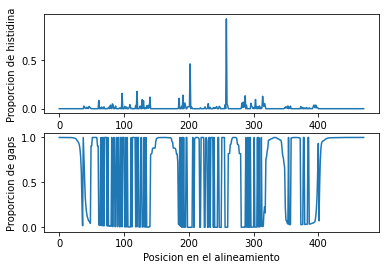

In [ ]:
H = []
for i in range(hmmaling_pd.shape[1]):
  H.append(sum([1 for j in hmmaling_pd[i] if j == "H"])/hmmaling_pd.shape[0])
Gap = []
for i in range(hmmaling_pd.shape[1]):
  Gap.append(sum([1 for j in hmmaling_pd[i] if j == "-"])/hmmaling_pd.shape[0])

plt.subplot(211)
plt.plot(H)
plt.ylabel("Proporcion de histidina")
plt.subplot(212)
plt.plot(Gap)
plt.ylabel("Proporcion de gaps")
plt.xlabel("Posicion en el alineamiento")

print("{} es la posicion de maxima conservacion de histidina en el alinemiento con una proporcion de {}".format(H.index(max(H)), round(max(H),4)))
print("en esa posicion hay una proporcion de gaps de {}".format(round(Gap[H.index(max(H))],4)))

Comparando ambos alineamientos se puede ver que al alineamiento realizado com mafft presenta mayor numero de gaps que el realizado con hmmaling y es mas largo. La histidina F8 no se encuentra en la misma posicion en ambos alineamientos ni presenta la misma conservacion. Para esta posicion mafft presenta aproximadamente el doble de gaps que hmmaling, lo cual es esperable ya que hmmaling posee mayor cantidad de informacion para alinear las secuencias que mafft al contar con un hmm como guia.

In [ ]:
#3)b)1)
!mafft globin_seed.fasta > globin_seed_msa.fasta
!hmmbuild globin_seed_modelo.hmm globin_seed_msa.fasta
!hmmsearch globin_seed_modelo.hmm globin_full_sequences.fasta > globin.out

!mafft bac_globin_seed.fasta > bac_seed_msa.fasta
!hmmbuild bac_seed_modelo.hmm bac_seed_msa.fasta
!hmmsearch bac_seed_modelo.hmm globin_full_sequences.fasta > bac_globin.out


nthread = 0
stacksize: 8192 kb
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 1351 ambiguous characters.
    1 / 73
done.

Constructing a UPGMA tree (efffree=0) ... 
   70 / 73
done.

Progressive alignment 1/2... 
STEP    18 / 72 f
Reallocating..done. *alloclen = 1262
STEP    72 / 72 d
done.

Making a distance matrix from msa.. 
    0 / 73
done.

Constructing a UPGMA tree (efffree=1) ... 
   70 / 73
done.

Progressive alignment 2/2... 
STEP    18 / 72 d
Reallocating..done. *alloclen = 1251
STEP    72 / 72 d
done.

disttbfast (aa) Version 7.310 alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into

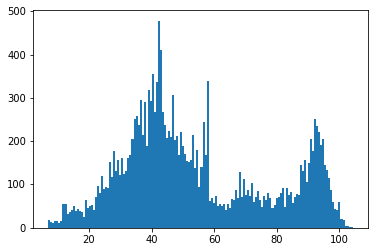

In [ ]:
#3)b)2)
hist_puntajes("globin.out")

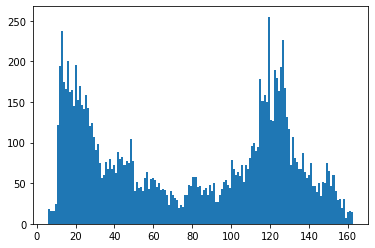

In [ ]:
hist_puntajes("bac_globin.out")



```
# Tiene formato de código
```

globin corte en 60 y bac globin corte en 70?

In [ ]:
lista_globin = extraerPosiciones(60, "globin.out")
guardarDominios("globin_full_sequences.fasta", lista_globin, "globin_domain","globin_sequences.fasta")

In [ ]:
lista_bac_globin = extraerPosiciones(70, "bac_globin.out")
guardarDominios("globin_full_sequences.fasta", lista_bac_globin, "bac_globin_domain", "bac_globin_sequences.fasta")

In [ ]:
#3)b)3)
print("protoglobins: {}, globins: {} bac globins: {}".format(len(list(lista_protoglobin.keys())),len(list(lista_globin.keys())),len(list(lista_bac_globin.keys()))))
dicc_compartidas = defaultdict(list)
for key1 in lista_protoglobin.keys():
  dicc_compartidas[key1].append("protoglobins")
for key2 in lista_globin.keys():
  dicc_compartidas[key2].append("globins")
for key3 in lista_bac_globin.keys():
  dicc_compartidas[key3].append("bac_globins")
print("proteinas compartidas:")
for key in dicc_compartidas.keys():
  if len(dicc_compartidas[key]) > 1:
    print(key, dicc_compartidas[key])




protoglobins: 5629, globins: 5839 bac globins: 6297
proteinas compartidas:


In [ ]:
#saco ids duplicados agregandole un indicador de posicion
from Bio import SeqIO
listas = ["protoglobin_sequences.fasta", "globin_sequences.fasta", "bac_globin_sequences.fasta"]
for lista in listas:
  resultados=list(SeqIO.parse(open(lista), "fasta"))
  lista2 = []
  for i, res in enumerate(resultados):
      if res.id not in lista2:
          lista2.append(res.id)
      else:
          res.id = res.id + "_" + str(i)

  with open(lista, "w") as output_handle:
      SeqIO.write(resultados, output_handle, "fasta")

In [ ]:
#3)b)4)
modelos = ["seed_modelo.hmm", "globin_seed_modelo.hmm", "bac_seed_modelo.hmm"]
listas = ["protoglobin_sequences.fasta", "globin_sequences.fasta", "bac_globin_sequences.fasta"]
for modelo in modelos:
  for lista in listas:
    nombre = modelo + lista + ".out"
    !hmmsearch $modelo $lista > $nombre


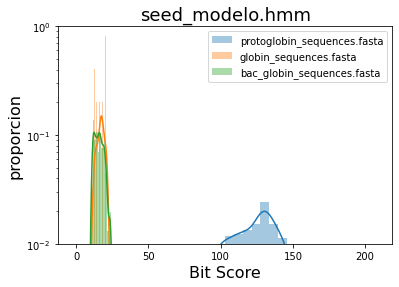

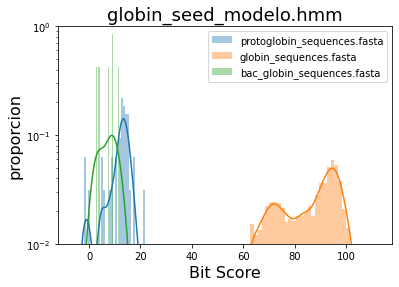

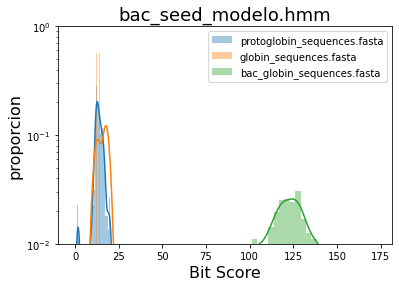

In [ ]:
for modelo in modelos:
  for lista in listas:
    nombre = modelo + lista + ".out"
    #print(nombre)
    lista=[]
    resultados=list(SearchIO.read(nombre,'hmmer3-text'))
    for hit in resultados:
      for hsp in hit:
        lista.append(hsp.bitscore)
    sns.distplot(lista, bins =30)
  plt.title(modelo, fontsize=18)
  plt.xlabel('Bit Score', fontsize=16)
  plt.ylabel('proporcion', fontsize=16)
  plt.legend(listas)
  plt.ylim(0.01,1)
  plt.yscale('log')
  plt.show()

